## Introduction:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## EDA

In [ ]:
train_df.shape

(20000, 22)

In [ ]:
train_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [ ]:
test_df.shape # tập dữ liệu test, không có label

(5000, 21)

In [ ]:
test_df.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [ ]:
# kiểm tra các cột
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [ ]:
# nhận xét kiểu dữ liệu của các cột

# các cột numerical
numerical_cols = train_df.select_dtypes(include=['number']).columns

# các cột categorical
categorical_cols = []

# các cột text đơn thuần
text_cols = []

# cột ngày tháng
date_cols = []

# phân loại vào categorical vs text
threshold = 0.005  # Ngưỡng 0.5%
# Kiểm tra các cột có kiểu dữ liệu là object
for col in train_df.select_dtypes(include=['object']).columns:
    unique_count = train_df[col].nunique()
    total_count = len(train_df[col])
    unique_ratio = unique_count / total_count
    if (col == 'Date_Occurred' or col == 'Date_Reported'):
        date_cols.append(col)
    elif unique_ratio < threshold:
        categorical_cols.append(col)
        print(f"{col}: {unique_count} unique values ({unique_ratio:.2%}) - Categorical")
    else:
        text_cols.append(col)
        print(f"{col}: {unique_count} unique values ({unique_ratio:.2%}) - Text")
print("------------------")
print("1. numerical columns: ", numerical_cols.values)
print("2. categorical columns: ", categorical_cols)
print("3. text_columns: ", text_cols)
print("4. date_columns: ", date_cols)

Location: 12399 unique values (61.99%) - Text
Cross_Street: 1495 unique values (7.47%) - Text
Area_Name: 21 unique values (0.10%) - Categorical
Modus_Operandi: 10489 unique values (52.45%) - Text
Victim_Sex: 4 unique values (0.02%) - Categorical
Victim_Descent: 17 unique values (0.08%) - Categorical
Premise_Description: 216 unique values (1.08%) - Text
Weapon_Description: 57 unique values (0.29%) - Categorical
Status: 5 unique values (0.03%) - Categorical
Status_Description: 5 unique values (0.03%) - Categorical
Crime_Category: 6 unique values (0.03%) - Categorical
------------------
1. numerical columns:  ['Latitude' 'Longitude' 'Time_Occurred' 'Area_ID' 'Reporting_District_no'
 'Part 1-2' 'Victim_Age' 'Premise_Code' 'Weapon_Used_Code']
2. categorical columns:  ['Area_Name', 'Victim_Sex', 'Victim_Descent', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category']
3. text_columns:  ['Location', 'Cross_Street', 'Modus_Operandi', 'Premise_Description']
4. date_columns:  ['D

In [ ]:
numerical_columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no',
                    'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']
categorical_columns = ['Area_Name', 'Victim_Sex', 'Victim_Descent',
                      'Weapon_Description', 'Status', 'Status_Description',
                      'Crime_Category']
text_columns = ['Location', 'Cross_Street', 'Modus_Operandi', 'Premise_Description']

In [ ]:
# kiểm tra missing values
train_df.isna().sum()

,0
Location,0
Cross_Street,16552
Latitude,0
Longitude,0
Date_Reported,0
Date_Occurred,0
Time_Occurred,0
Area_ID,0
Area_Name,0
Reporting_District_no,0


In [ ]:
train_df[train_df['Victim_Age'] < 0]

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
251,1700 ORCHID AV,NaN,34.1030,-118.3402,06/02/2023 12:00:00 AM,05/31/2020 12:00:00 AM,430.0,6.0,Hollywood,645.0,...,-2.0,X,X,203.0,OTHER BUSINESS,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,Property Crimes
717,16800 SAN FERNANDO MISSION BL,NaN,34.2720,-118.4978,05/25/2023 12:00:00 AM,06/02/2020 12:00:00 AM,1.0,17.0,Devonshire,1737.0,...,-2.0,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Fraud and White-Collar Crimes
5877,4100 GREENBRIAR LN,NaN,34.1459,-118.5350,05/19/2021 12:00:00 AM,01/01/2020 12:00:00 AM,1200.0,10.0,West Valley,1094.0,...,-1.0,M,O,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
11008,12200 WILSHIRE BL,NaN,34.0432,-118.4685,06/20/2022 12:00:00 AM,06/19/2020 12:00:00 AM,1600.0,8.0,West LA,841.0,...,-1.0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,Property Crimes
12993,13000 OXNARD ST,NaN,34.1794,-118.4161,03/16/2022 12:00:00 AM,03/13/2020 12:00:00 AM,1200.0,9.0,Van Nuys,939.0,...,-1.0,F,W,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont,Property Crimes
14021,8600 S SEPULVEDA BL,NaN,33.9598,-118.3962,01/18/2022 12:00:00 AM,07/16/2020 12:00:00 AM,300.0,14.0,Pacific,1487.0,...,-1.0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,Property Crimes


In [ ]:
train_df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [ ]:
def extract_date_features(df, date_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        # Tạo các cột mới với thông tin từ ngày
        df[f'{col}_day_of_week'] = df[col].dt.dayofweek #0 - monday, 6 - sunday
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day_of_year'] = df[col].dt.dayofyear
        categorical_columns.append(f'{col}_day_of_week')
        categorical_columns.append(f'{col}_month')

    return df

date_cols = ['Date_Reported', 'Date_Occurred']
extract_date_features(train_df, date_cols)
extract_date_features(test_df, date_cols)

<ipython-input-386-ef5202830854>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-386-ef5202830854>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-386-ef5202830854>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
<ipython-input-386-ef5202830854>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Date_Reported_day_of_week,Date_Reported_month,Date_Reported_day_of_year,Date_Occurred_day_of_week,Date_Occurred_month,Date_Occurred_day_of_year
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,2020-03-03,2020-03-03,2000.0,3.0,Southwest,376.0,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1,3,63,1,3,63
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,2020-06-01,2020-04-25,1700.0,20.0,Olympic,2014.0,...,NaN,NaN,IC,Invest Cont,0,6,153,5,4,116
2,300 E 111TH ST,NaN,33.9348,-118.2695,2020-08-28,2020-08-27,900.0,18.0,Southeast,1844.0,...,NaN,NaN,IC,Invest Cont,4,8,241,3,8,240
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,2020-12-23,2020-12-03,2200.0,7.0,Wilshire,765.0,...,NaN,NaN,IC,Invest Cont,2,12,358,3,12,338
4,11000 MORRISON ST,NaN,34.1611,-118.3704,2020-08-30,2020-08-29,130.0,15.0,N Hollywood,1555.0,...,NaN,NaN,AO,Adult Other,6,8,243,5,8,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4600 MASCOT ST,NaN,34.0409,-118.3408,2020-06-05,2020-06-04,2100.0,7.0,Wilshire,775.0,...,NaN,NaN,IC,Invest Cont,4,6,157,3,6,156
4996,2200 E 7TH ST,NaN,34.0347,-118.2253,2020-12-02,2020-11-25,1530.0,4.0,Hollenbeck,471.0,...,NaN,NaN,IC,Invest Cont,2,12,337,2,11,330
4997,LANGDON AV,TUPPER ST,34.2392,-118.4698,2020-11-21,2020-11-21,2100.0,19.0,Mission,1961.0,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,5,11,326,5,11,326
4998,400 E 5TH ST,NaN,34.0453,-118.2443,2020-03-01,2020-02-29,2335.0,1.0,Central,147.0,...,500.0,UNKNOWN WEAPON/OTHER WEAPON,AO,Adult Other,6,3,61,5,2,60


### Univariate

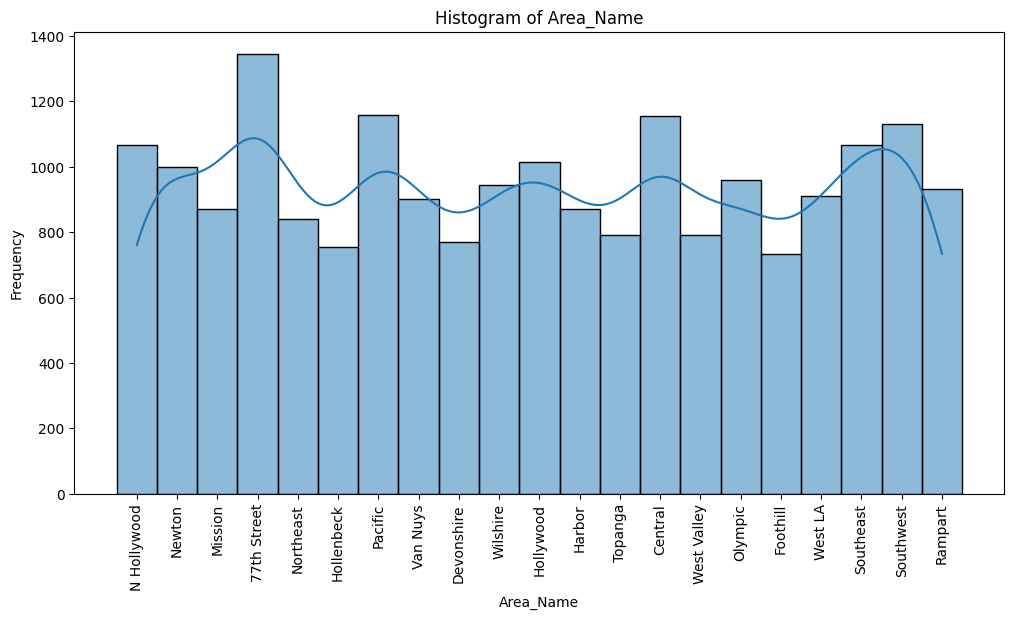

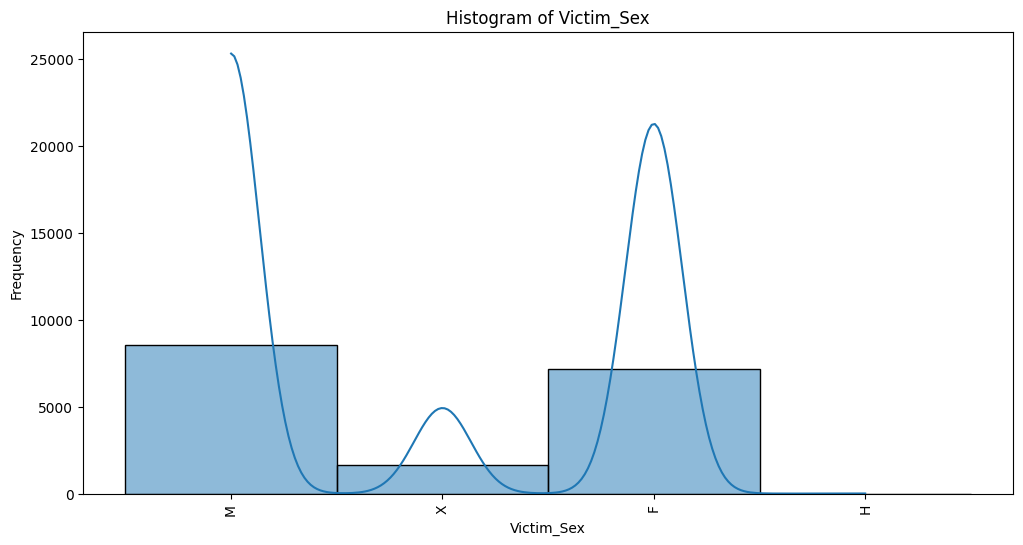

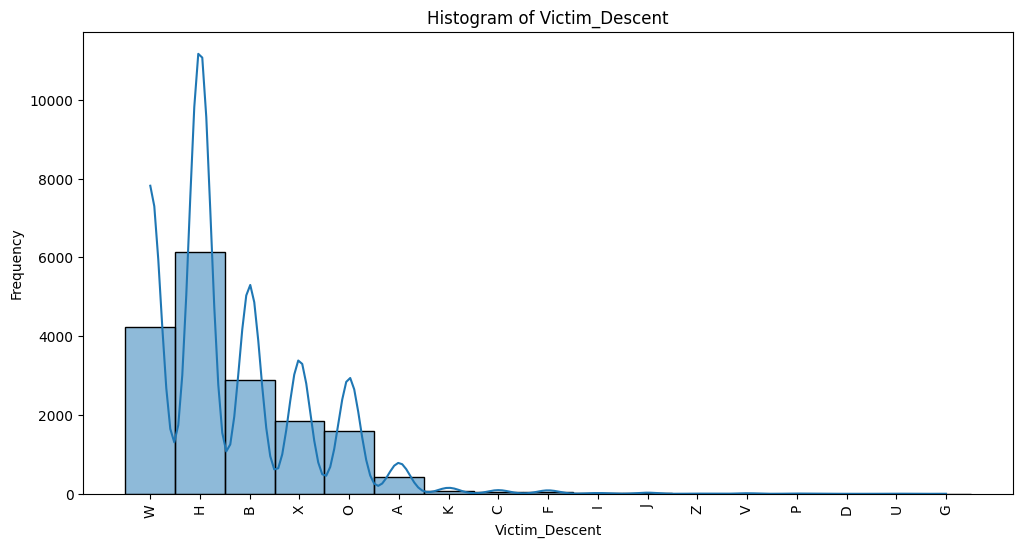

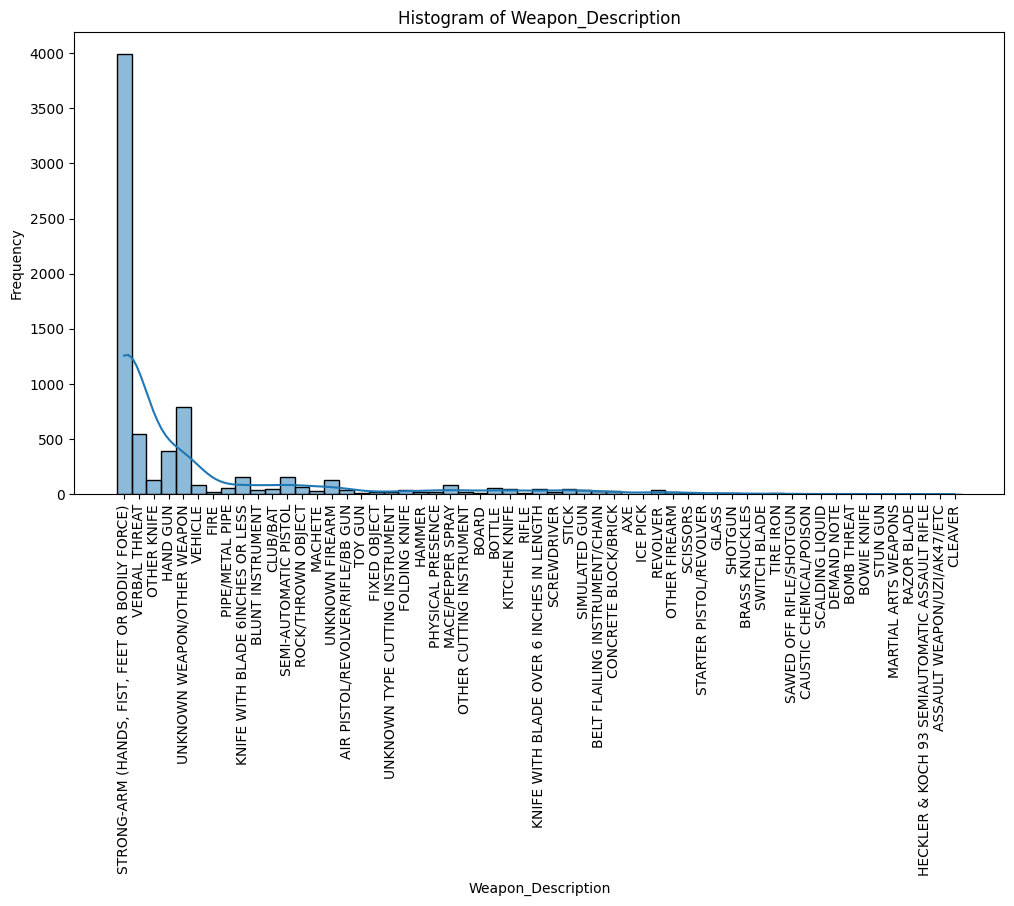

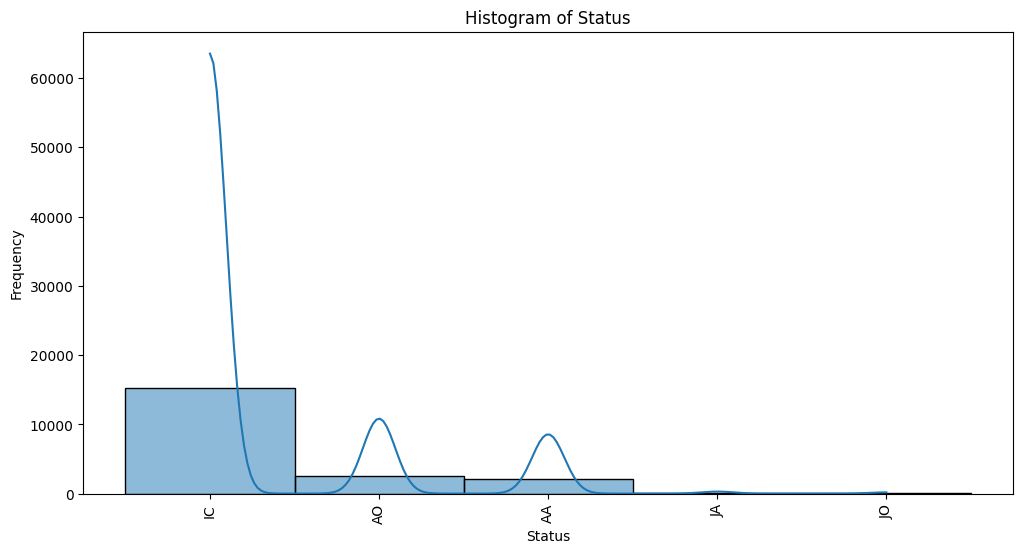

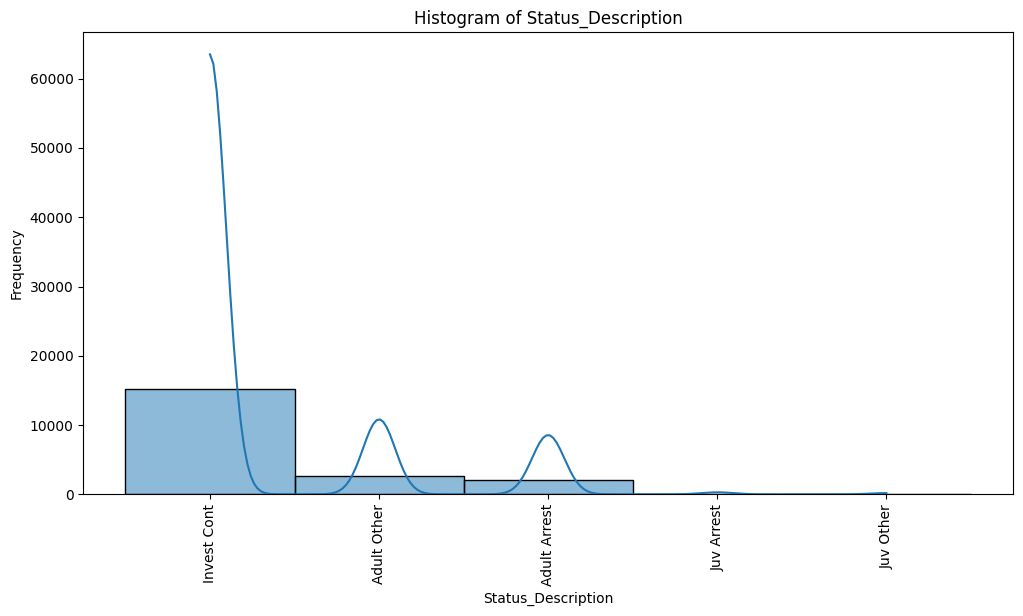

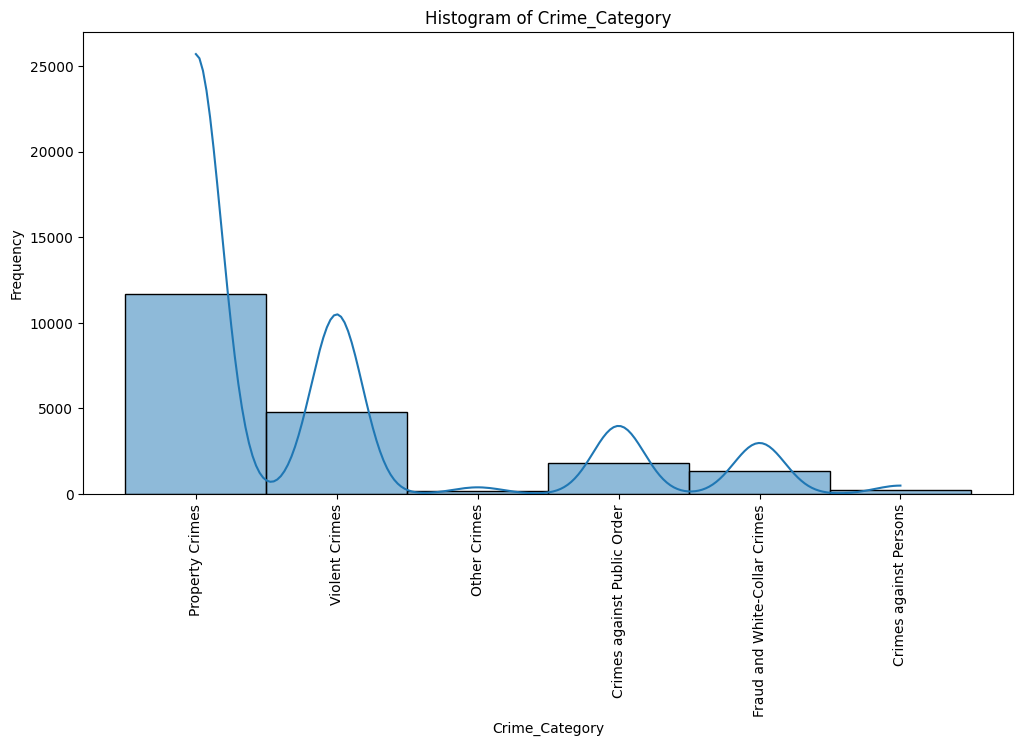

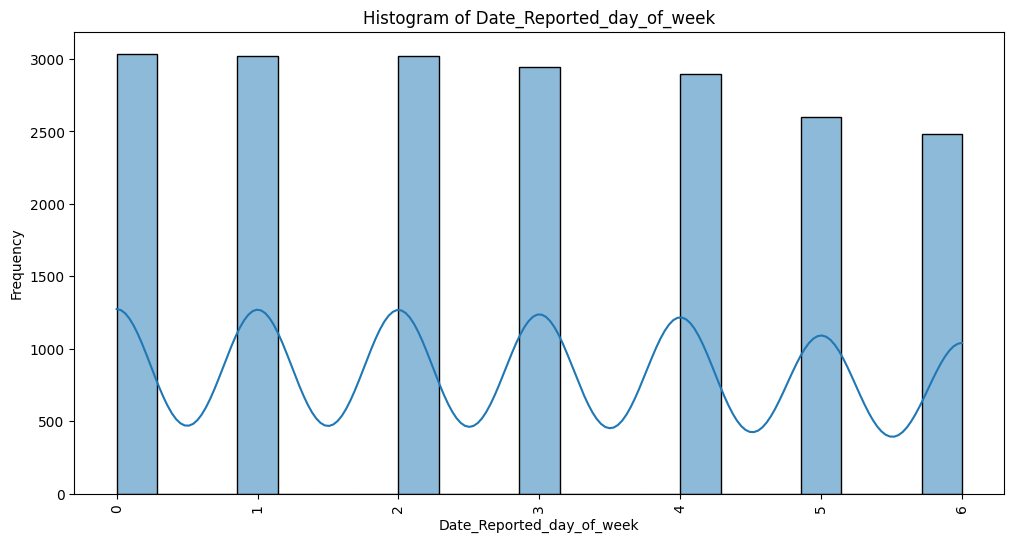

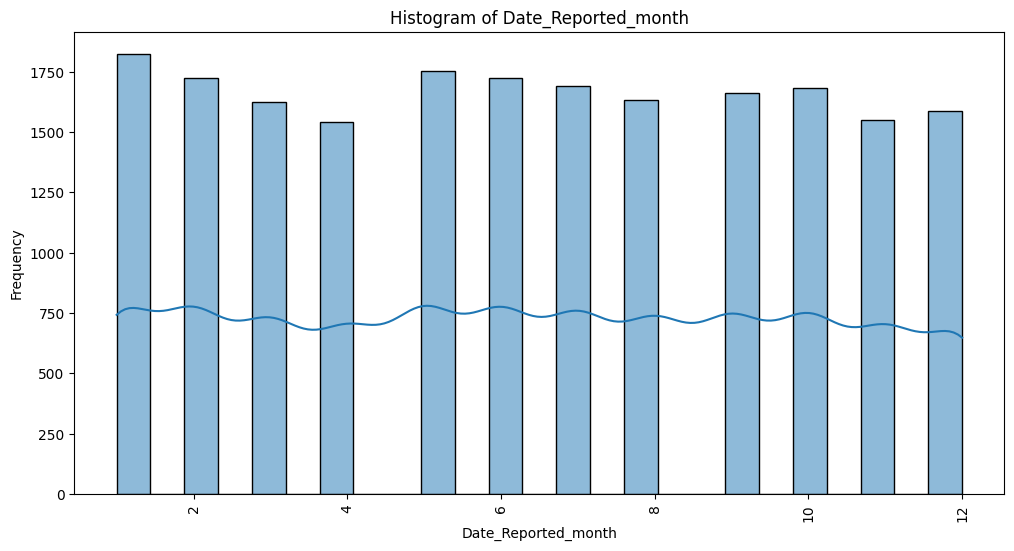

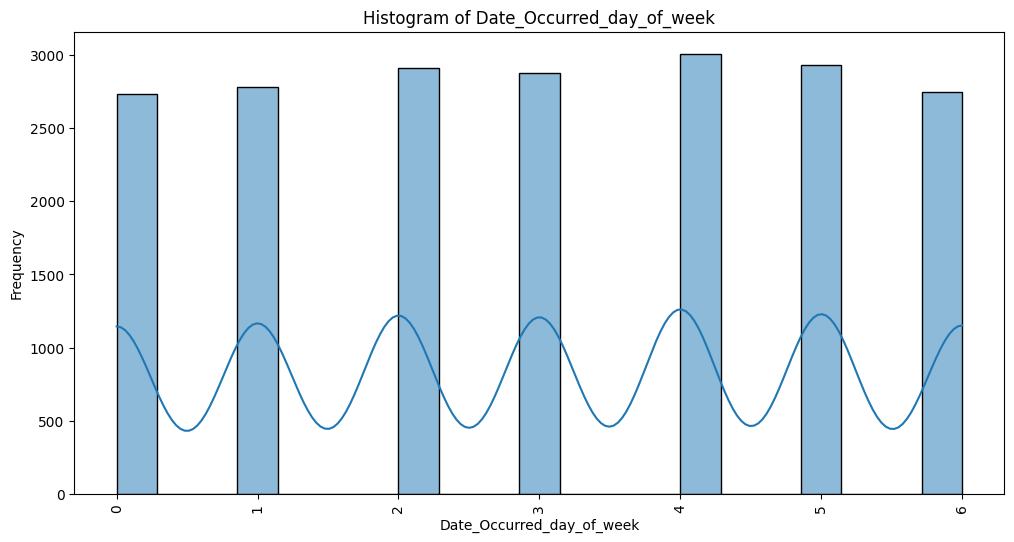

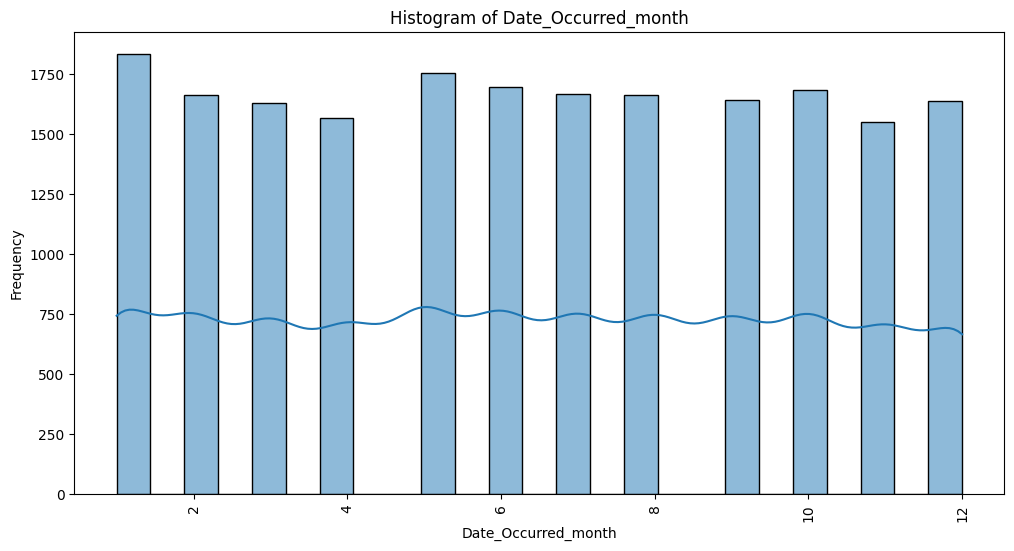

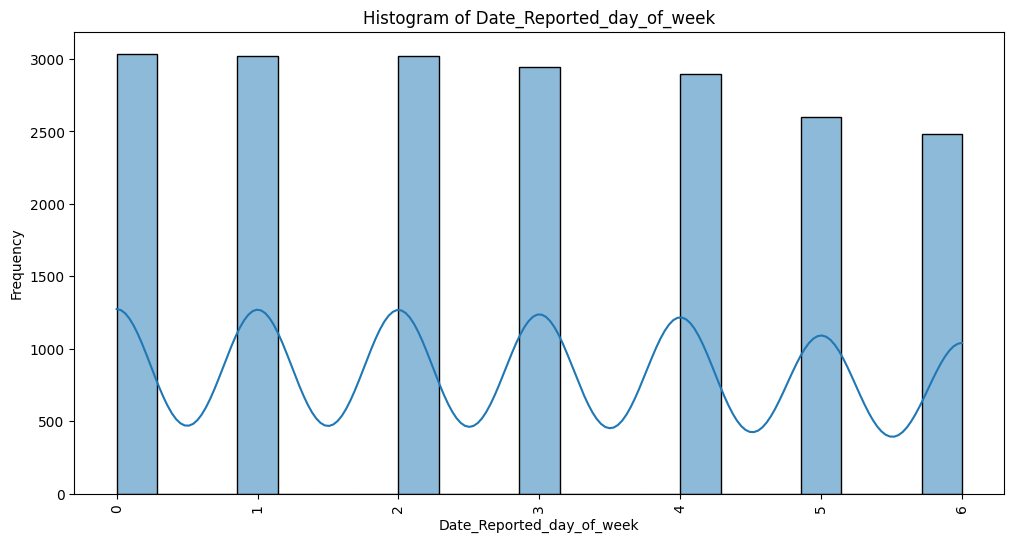

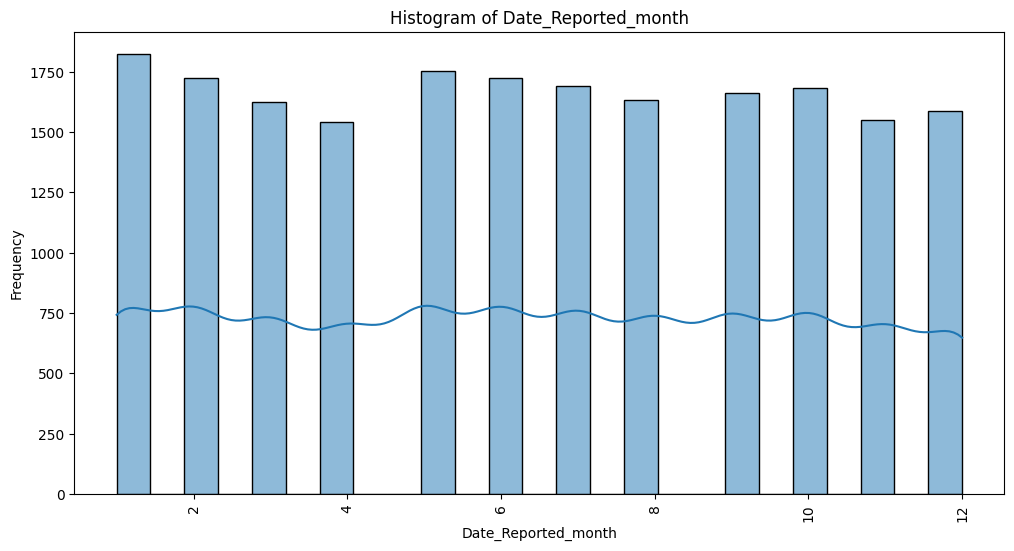

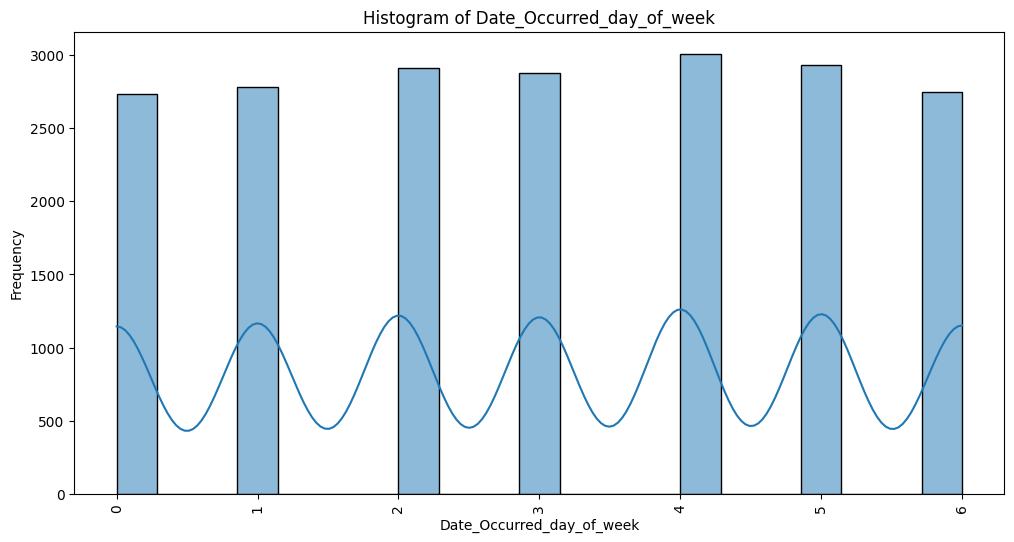

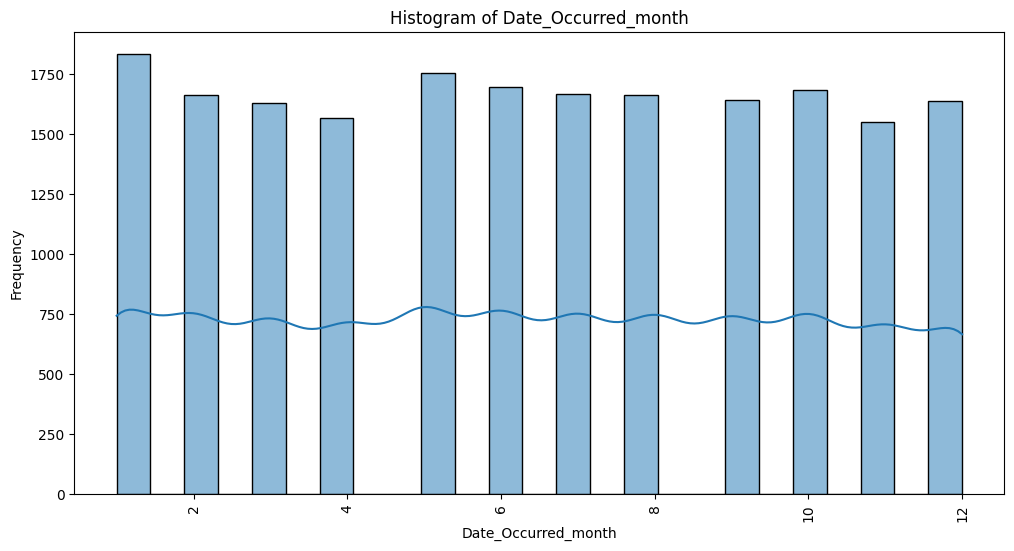

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.ylabel('Frequency')
    plt.show()

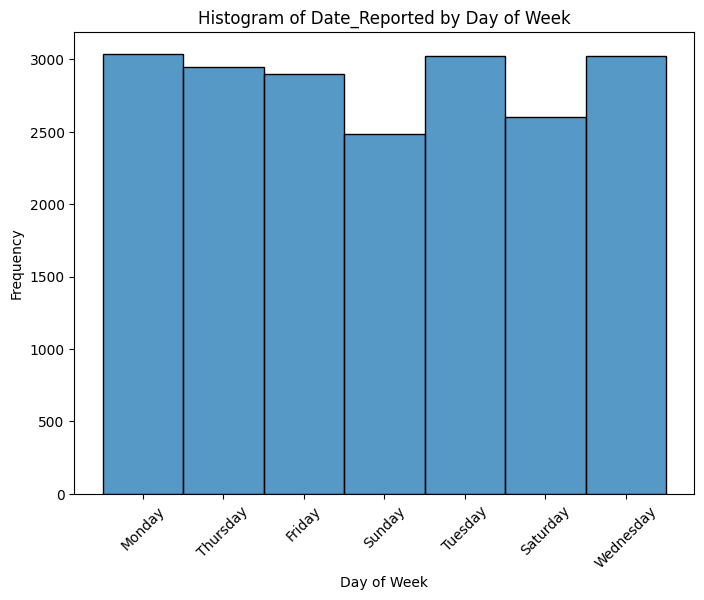

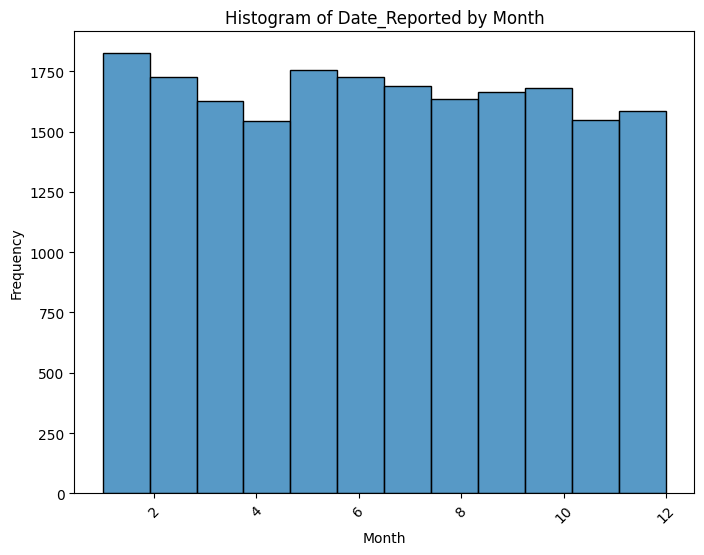

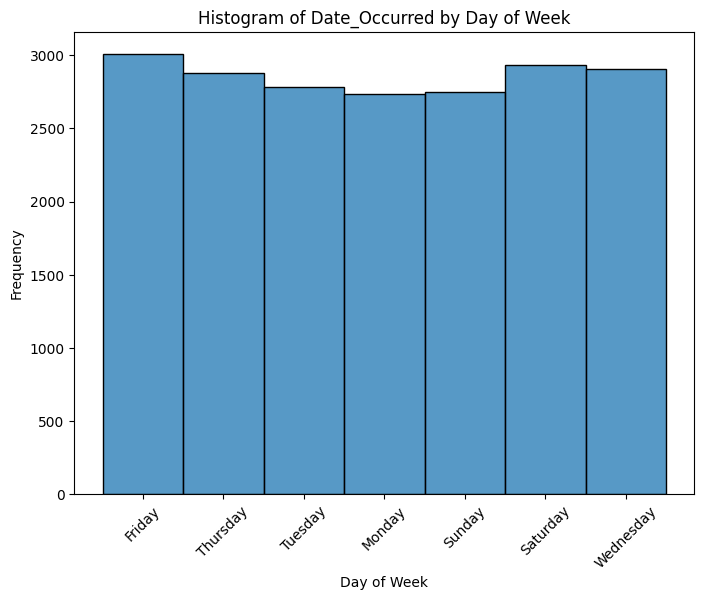

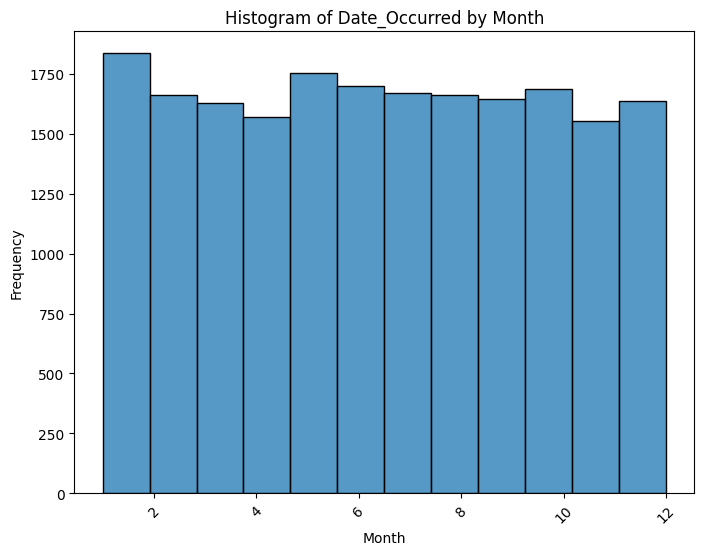

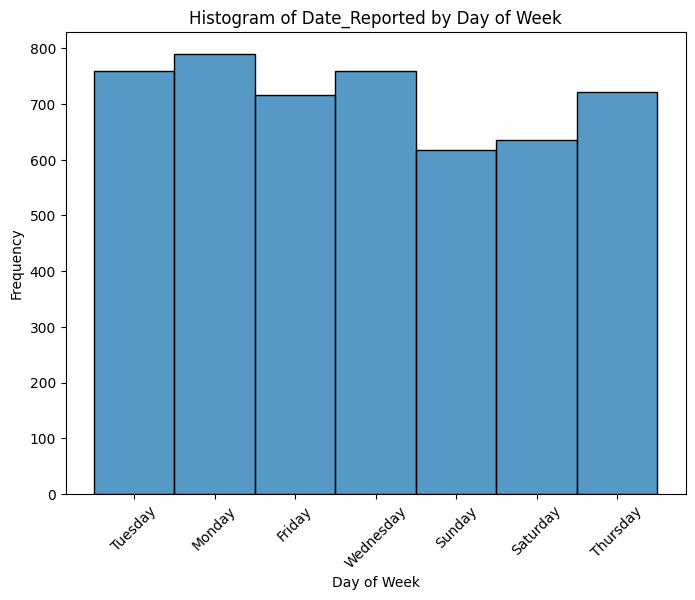

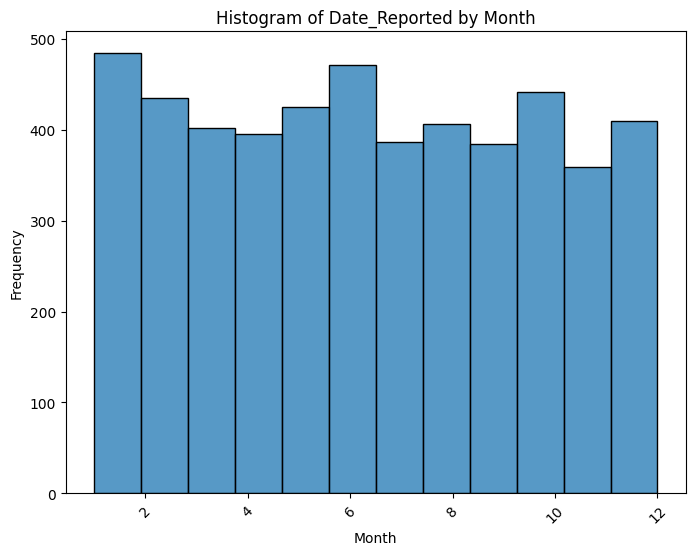

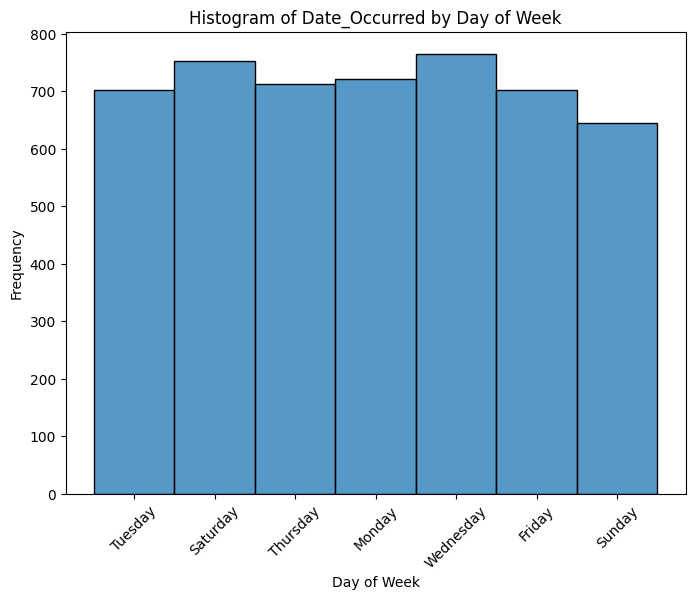

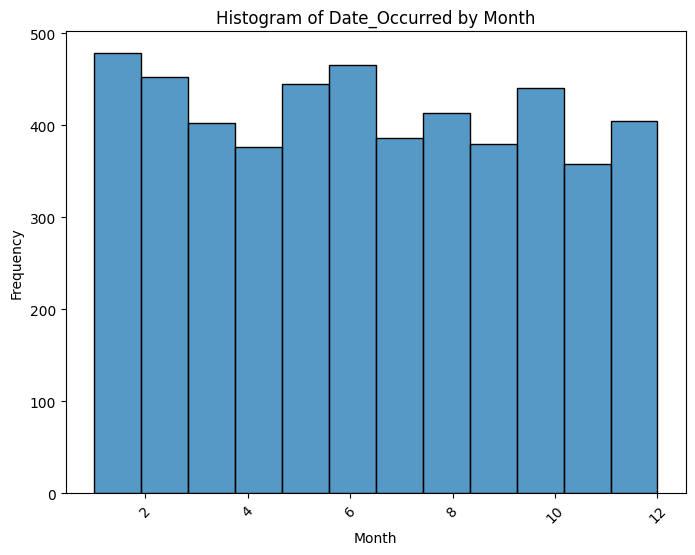

In [ ]:
def plot_date_histograms(df, date_cols):
    for col in date_cols:
        # Chuyển đổi cột thành định dạng datetime nếu chưa được chuyển
        df[col] = pd.to_datetime(df[col], errors='coerce')

        # Vẽ biểu đồ phân phối theo ngày trong tuần
        df[f'{col}_day_of_week'] = df[col].dt.day_name()
        plt.figure(figsize=(8, 6))
        sns.histplot(df[f'{col}_day_of_week'], kde=False)
        plt.title(f'Histogram of {col} by Day of Week')
        plt.xlabel('Day of Week')
        plt.xticks(rotation=45)
        plt.ylabel('Frequency')
        plt.show()

        # Vẽ biểu đồ phân phối theo tháng
        df[f'{col}_month'] = df[col].dt.month  # Tháng
        plt.figure(figsize=(8, 6))
        sns.histplot(df[f'{col}_month'], kde=False, bins=12)
        plt.title(f'Histogram of {col} by Month')
        plt.xlabel('Month')
        plt.xticks(rotation=45)
        plt.ylabel('Frequency')
        plt.show()

# Gọi hàm với sample_df và các cột datetime cần vẽ
date_cols = ['Date_Reported', 'Date_Occurred']  # Danh sách các cột datetime
plot_date_histograms(train_df, date_cols)
plot_date_histograms(test_df, date_cols)


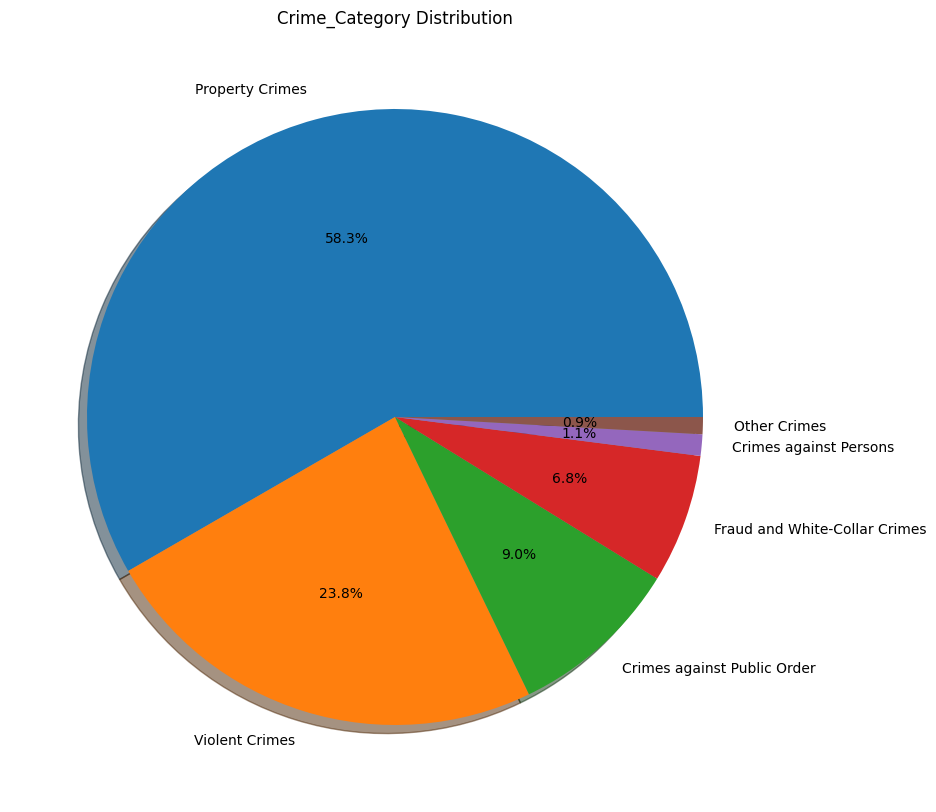

In [ ]:
# target EDA
values = pd.Series(train_df['Crime_Category'])
v_counts = values.value_counts()
total = len(values)
fig = plt.figure(figsize=(10,10))
plt.title("Crime_Category Distribution")
plt.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%', shadow=True)
plt.show()

#### Univariate Conclusion:
-
-
-

### Outliers

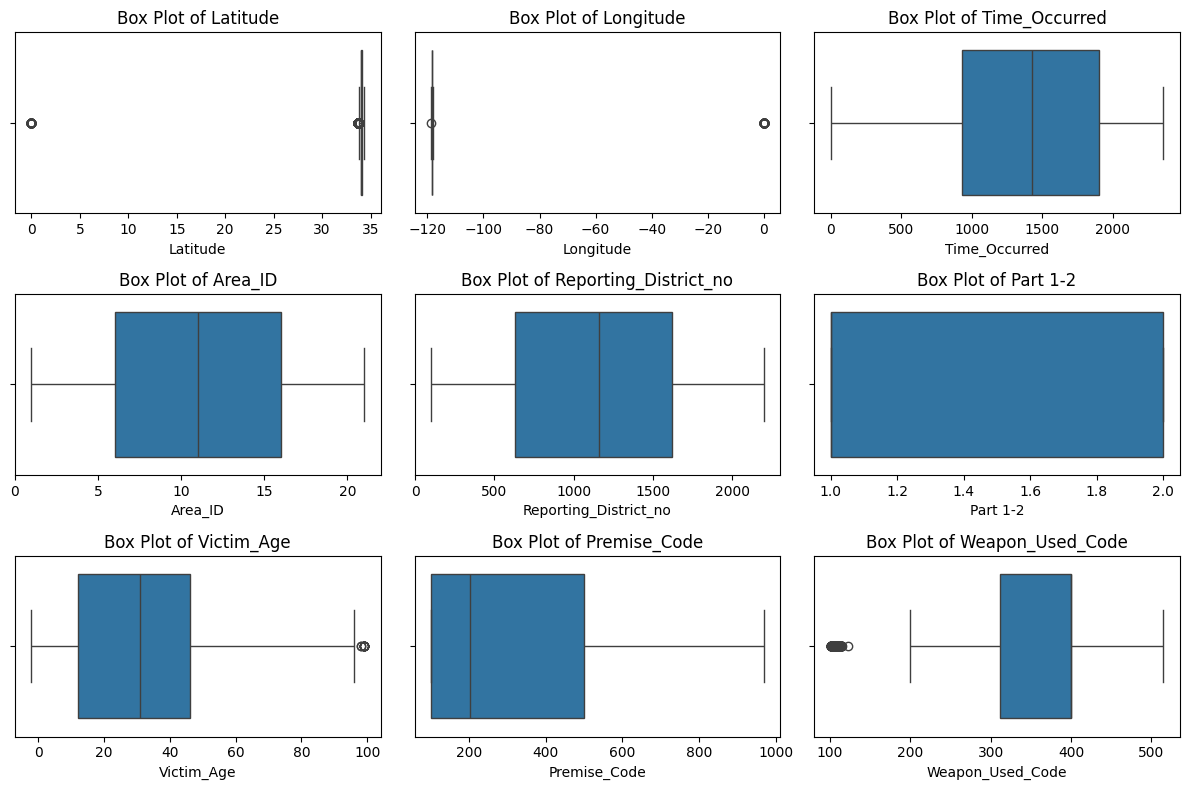

In [ ]:
# vẽ biểu đồ cho các cột dạng số để nhận biết outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_df, x=col)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

### EDA Conclusion:

1. Top Crime Areas:

    High crime frequency in 77th Street, Pacific, Central, and Southwest. These areas may have specific socio-economic or environmental factors influencing crime rates.

2. Gender and Crime:

    Males are the most frequent offenders. Investigate age groups and crime types to understand male-dominated crime patterns, particularly in violent vs. non-violent crimes.

3. Victim Descent:

    W (White), H (Hispanic), and B (Black) are the top victim descents. Socioeconomic factors or residential segregation may contribute to these patterns.

4. Weapons Used:

    Bodily force, verbal threats, and unknown weapons are most common. Focus on interventions like de-escalation, conflict resolution, and mental health support in communities.

5. Crime Status:

    Investigation Continuation (IC) is the highest status, indicating ongoing investigations. Explore causes for delayed resolutions and resource allocation.

6. Top Crime Categories:

    Property crimes, violent crimes, crimes against public order, and white-collar crimes are most prevalent. Focus on property and violent crime prevention and addressing financial crimes.

7. Crimes by Day of Week:

    More crimes occur on weekdays, particularly Monday-Wednesday. Investigate work-related stressors or public activity contributing to this trend.

8. Crimes by Month:

   April, November, and December see fewer crimes, possibly due to weather or holiday effects. Recognize seasonal trends for better crime prevention strategies.

## PreProcessing Data

### Handle missing values

In [ ]:
# xử lý missing values
def handle_missing_values(df, numerical_columns, categorical_columns, text_columns):
    # Xử lý các cột numerical
    for col in numerical_columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

    # Xử lý các cột categorical
    for col in categorical_columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna('Unknown', inplace=True)

    # Xử lý các cột text
    for col in text_columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna('No Information', inplace=True)

    return df

handle_missing_values(train_df, numerical_columns, categorical_columns, text_columns)

<ipython-input-387-d43eda21c397>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-387-d43eda21c397>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Weapon_Description,Status,Status_Description,Crime_Category,Date_Reported_day_of_week,Date_Reported_month,Date_Reported_day_of_year,Date_Occurred_day_of_week,Date_Occurred_month,Date_Occurred_day_of_year
0,4500 CARPENTER AV,No Information,34.1522,-118.3910,2020-03-09,2020-03-06,1800.0,15.0,N Hollywood,1563.0,...,Unknown,IC,Invest Cont,Property Crimes,0,3,69,4,3,66
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2020-02-27,2020-02-27,1345.0,13.0,Newton,1367.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,3,2,58,3,2,58
2,600 E MARTIN LUTHER KING JR BL,No Information,34.0111,-118.2653,2020-08-21,2020-08-21,605.0,13.0,Newton,1343.0,...,Unknown,IC,Invest Cont,Property Crimes,4,8,234,4,8,234
3,14900 ORO GRANDE ST,No Information,34.2953,-118.4590,2020-11-08,2020-11-06,1800.0,19.0,Mission,1924.0,...,Unknown,IC,Invest Cont,Property Crimes,6,11,313,4,11,311
4,7100 S VERMONT AV,No Information,33.9787,-118.2918,2020-02-25,2020-02-25,1130.0,12.0,77th Street,1245.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,1,2,56,1,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,No Information,34.0334,-118.3523,2020-05-24,2020-05-24,700.0,3.0,Southwest,303.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes,6,5,145,6,5,145
19996,16900 ROSCOE BL,No Information,34.2212,-118.5011,2020-12-25,2020-12-25,259.0,10.0,West Valley,1008.0,...,Unknown,IC,Invest Cont,Property Crimes,4,12,360,4,12,360
19997,1000 S SHENANDOAH ST,No Information,34.0571,-118.3815,2020-09-25,2020-09-25,1400.0,8.0,West LA,849.0,...,Unknown,IC,Invest Cont,Property Crimes,4,9,269,4,9,269
19998,300 W SEPULVEDA ST,No Information,33.7451,-118.2835,2020-06-10,2020-06-10,600.0,5.0,Harbor,558.0,...,Unknown,IC,Invest Cont,Crimes against Public Order,2,6,162,2,6,162


### Handle outliers

In [ ]:
# remove outliers
cols_have_outliers = ['Longitude','Latitude','Victim_Age']
def handle_outliers(df):
    for col in cols_have_outliers:
      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 +  1.5 * IQR
      df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

train_df = handle_outliers(train_df)
train_df.shape

(19446, 28)

In [ ]:
train_df

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Weapon_Description,Status,Status_Description,Crime_Category,Date_Reported_day_of_week,Date_Reported_month,Date_Reported_day_of_year,Date_Occurred_day_of_week,Date_Occurred_month,Date_Occurred_day_of_year
0,4500 CARPENTER AV,No Information,34.1522,-118.3910,2020-03-09,2020-03-06,1800.0,15.0,N Hollywood,1563.0,...,Unknown,IC,Invest Cont,Property Crimes,0,3,69,4,3,66
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2020-02-27,2020-02-27,1345.0,13.0,Newton,1367.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,3,2,58,3,2,58
2,600 E MARTIN LUTHER KING JR BL,No Information,34.0111,-118.2653,2020-08-21,2020-08-21,605.0,13.0,Newton,1343.0,...,Unknown,IC,Invest Cont,Property Crimes,4,8,234,4,8,234
3,14900 ORO GRANDE ST,No Information,34.2953,-118.4590,2020-11-08,2020-11-06,1800.0,19.0,Mission,1924.0,...,Unknown,IC,Invest Cont,Property Crimes,6,11,313,4,11,311
4,7100 S VERMONT AV,No Information,33.9787,-118.2918,2020-02-25,2020-02-25,1130.0,12.0,77th Street,1245.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes,1,2,56,1,2,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,100 W 106TH ST,No Information,33.9401,-118.2744,2020-12-04,2020-11-24,1140.0,18.0,Southeast,1832.0,...,Unknown,IC,Invest Cont,Fraud and White-Collar Crimes,4,12,339,1,11,329
19995,5100 W ADAMS BL,No Information,34.0334,-118.3523,2020-05-24,2020-05-24,700.0,3.0,Southwest,303.0,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes,6,5,145,6,5,145
19996,16900 ROSCOE BL,No Information,34.2212,-118.5011,2020-12-25,2020-12-25,259.0,10.0,West Valley,1008.0,...,Unknown,IC,Invest Cont,Property Crimes,4,12,360,4,12,360
19997,1000 S SHENANDOAH ST,No Information,34.0571,-118.3815,2020-09-25,2020-09-25,1400.0,8.0,West LA,849.0,...,Unknown,IC,Invest Cont,Property Crimes,4,9,269,4,9,269


### Feature Extracting


In [ ]:
def feature_extract(df):
    df['Is_CrossStreet'] = df['Cross_Street'].apply(lambda x: 0 if x == 'No Information' else 1)
    df['Victim_Present'] = df['Victim_Age'].apply(lambda x: 0 if x <= 0 else 1)

    # 3. Handle date columns
    date_format = '%m/%d/%Y %I:%M:%S %p'
    df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], format=date_format)
    df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'], format=date_format)

    df['Days_Lapsed'] = (df['Date_Reported'] - df['Date_Occurred']).dt.days

    df['Reporting_District_no'] = df['Reporting_District_no'].astype(int)
    df['Rep_Dist_no'] = df['Reporting_District_no'].apply(lambda x: int(str(x)[-2:]))

    df['Hour_Occ'] = df['Time_Occurred'].apply(lambda x: int(x / 100))

    df['Part 1-2'] = df['Part 1-2'].astype(int).apply(lambda x: 0 if x == 1 else 1)

    df['PCode'] = df['Premise_Code'].apply(lambda x: int(x / 100))

    df['IsArrest'] = df['Status'].apply(lambda status: 1 if status in ['AA', 'JA'] else 0)

    # 5. Drop redundant columns
    redundant_columns = ['Location', 'Area_Name', 'Premise_Description', 'Status_Description',
                         'Date_Reported', 'Date_Occurred', 'Cross_Street', 'Weapon_Description', 'Time_Occurred']
    df.drop(columns=redundant_columns, inplace=True)

    return df


In [ ]:
train_df = feature_extract(train_df)

In [ ]:
test_df = feature_extract(test_df)

In [ ]:
train_df

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,Date_Occurred_day_of_week,Date_Occurred_month,Date_Occurred_day_of_year,Is_CrossStreet,Victim_Present,Days_Lapsed,Rep_Dist_no,Hour_Occ,PCode,IsArrest
0,34.1522,-118.3910,15.0,1563,0,0385,75.0,M,W,101.0,...,Friday,3,66,0,1,3,63,18,1,0
1,34.0028,-118.2391,13.0,1367,0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,...,Thursday,2,58,1,1,0,67,13,2,0
2,34.0111,-118.2653,13.0,1343,1,0329 1202,67.0,M,B,501.0,...,Friday,8,234,0,1,0,43,6,5,0
3,34.2953,-118.4590,19.0,1924,0,0329 1300,61.0,M,H,101.0,...,Friday,11,311,0,1,2,24,18,1,0
4,33.9787,-118.2918,12.0,1245,0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,...,Tuesday,2,56,0,0,0,45,11,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,33.9401,-118.2744,18.0,1832,1,0100 0922 1822,60.0,M,H,605.0,...,Tuesday,11,329,0,1,10,32,11,6,0
19995,34.0334,-118.3523,3.0,303,1,0416 0446 2004 0913,51.0,M,H,501.0,...,Sunday,5,145,0,1,0,3,7,5,0
19996,34.2212,-118.5011,10.0,1008,0,1822 0209 0344 1414 1420,0.0,M,W,301.0,...,Friday,12,360,0,0,0,8,2,3,0
19997,34.0571,-118.3815,8.0,849,0,0344 1822 1420,42.0,M,H,102.0,...,Friday,9,269,0,1,0,49,14,1,0


Note:

- The Modus Operandi (MO) column is crucial for understanding the methods or patterns of criminal activity. It typically stores information about how the crime was committed, often describing techniques, tools, or behavior patterns used by offenders.

- Given that several numbers can be stored in one cell, each number might represent a different method of crime (e.g., physical force, theft, or intimidation). It's important to decode and classify these numbers to group crimes by specific methods used. This can be done by mapping each number to a corresponding crime method.

- For instance:
    1 could represent armed robbery,
    2 could represent burglary,
    3 could represent fraud.

- Therefore, it is neccesary to split the values in modus operandi in to columns to make new features for training. Because categorized a crime is obviously need to based on the methods used in such crimes.

In [ ]:
# Handle modus operandi
def extract_modus_features(df, modus_col='Modus_Operandi'):
    # Get all unique modus operandi values from the dataset
    modus_set = set()
    for modus in df[modus_col].dropna():
        modus_values = str(modus).split(' ')
        modus_set.update(modus_values)

    # Create a DataFrame of zeros for all modus columns
    modus_columns = pd.DataFrame(0, index=df.index, columns=[f'Modus_{value}' for value in modus_set])

    # Iterate over the rows and update the modus columns
    for idx, row in df.iterrows():
        if pd.notna(row[modus_col]):
            modus_values = str(row[modus_col]).split(' ')
            for value in modus_values:
                col_name = f'Modus_{value}'
                modus_columns.at[idx, col_name] = 1  # Set the value at the specific index

    modus_df = pd.DataFrame(modus_columns)
    return modus_df


In [ ]:
train_modus = extract_modus_features(train_df)
test_modus = extract_modus_features(test_df)

for col in train_modus.columns:
    if col not in test_modus.columns:
        test_modus[col] = 0

test_modus = test_modus[train_modus.columns]

train_df = pd.concat([train_df, train_modus], axis=1)
train_df = train_df.drop('Modus_Operandi', axis=1)
test_df = pd.concat([test_df, test_modus], axis=1)
test_df = test_df.drop('Modus_Operandi', axis=1)


print(train_df.shape)
print(test_df.shape)

(19446, 507)
(5000, 506)


<ipython-input-393-6fa58e3aabeb>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_modus[col] = 0
<ipython-input-393-6fa58e3aabeb>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_modus[col] = 0
<ipython-input-393-6fa58e3aabeb>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_modus[col]

In [ ]:
train_df

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,...,Modus_0391,Modus_1265,Modus_1528,Modus_0362,Modus_1021,Modus_0112,Modus_2051,Modus_2046,Modus_1009,Modus_0401
0,34.1522,-118.3910,15.0,1563,0,75.0,M,W,101.0,400.0,...,0,0,0,0,0,0,0,0,0,0
1,34.0028,-118.2391,13.0,1367,0,41.0,M,H,216.0,400.0,...,0,0,0,0,0,0,0,0,0,0
2,34.0111,-118.2653,13.0,1343,1,67.0,M,B,501.0,400.0,...,0,0,0,0,0,0,0,0,0,0
3,34.2953,-118.4590,19.0,1924,0,61.0,M,H,101.0,400.0,...,0,0,0,0,0,0,0,0,0,0
4,33.9787,-118.2918,12.0,1245,0,0.0,X,X,401.0,400.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,33.9401,-118.2744,18.0,1832,1,60.0,M,H,605.0,400.0,...,0,0,0,0,0,0,0,0,0,0
19995,34.0334,-118.3523,3.0,303,1,51.0,M,H,501.0,400.0,...,0,0,0,0,0,0,0,0,0,0
19996,34.2212,-118.5011,10.0,1008,0,0.0,M,W,301.0,400.0,...,0,0,0,0,0,0,0,0,0,0
19997,34.0571,-118.3815,8.0,849,0,42.0,M,H,102.0,400.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df.shape

(5000, 506)

In [ ]:
test_df

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,...,Modus_0391,Modus_1265,Modus_1528,Modus_0362,Modus_1021,Modus_0112,Modus_2051,Modus_2046,Modus_1009,Modus_0401
0,34.0128,-118.3045,3.0,376,1,28.0,F,H,501.0,400.0,...,0,0,0,0,0,0,0,0,0,0
1,34.0726,-118.3029,20.0,2014,0,26.0,M,B,502.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,33.9348,-118.2695,18.0,1844,1,62.0,F,B,721.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,34.0497,-118.3442,7.0,765,0,0.0,NaN,NaN,108.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,34.1611,-118.3704,15.0,1555,1,37.0,F,W,501.0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,7.0,775,0,0.0,NaN,NaN,101.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4996,34.0347,-118.2253,4.0,471,0,0.0,X,X,116.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4997,34.2392,-118.4698,19.0,1961,1,38.0,M,H,101.0,400.0,...,0,0,0,0,0,0,0,0,0,0
4998,34.0453,-118.2443,1.0,147,1,41.0,M,B,502.0,500.0,...,0,0,0,0,0,0,0,0,0,0


### Handle data skewness

In [ ]:
# scale data, normalize data
def scale_data(df, numerical_cols):
  normalization = MinMaxScaler()
  df[numerical_cols] = normalization.fit_transform(df[numerical_cols])
  df.shape

new_numerical_cols = ['Area_ID','Latitude', 'Longitude','Victim_Age', 'Date_Occurred_day_of_week','Days_Lapsed','Reporting_District_no', 'Date_Occurred_day_of_year',
               'Premise_Code','Weapon_Used_Code','Date_Reported_day_of_week','Date_Reported_month', 'PCode','Rep_Dist_no','Date_Reported_day_of_year','Hour_Occ','Date_Occurred_month']

scale_data(train_df, new_numerical_cols)

In [ ]:
scale_data(test_df, new_numerical_cols)

In [ ]:
train_df.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,...,Modus_0391,Modus_1265,Modus_1528,Modus_0362,Modus_1021,Modus_0112,Modus_2051,Modus_2046,Modus_1009,Modus_0401
0,0.680936,0.537340,0.70,0.697519,0,0.793814,2,15,0.000000,0.722222,...,0,0,0,0,0,0,0,0,0,0
1,0.409940,0.840655,0.60,0.604008,0,0.443299,2,6,0.132488,0.722222,...,0,0,0,0,0,0,0,0,0,0
2,0.424995,0.788339,0.60,0.592557,1,0.711340,2,1,0.460829,0.722222,...,0,0,0,0,0,0,0,0,0,0
3,0.940504,0.401558,0.90,0.869752,0,0.649485,2,6,0.000000,0.722222,...,0,0,0,0,0,0,0,0,0,0
4,0.366225,0.735423,0.55,0.545802,0,0.020619,4,16,0.345622,0.722222,...,0,0,0,0,0,0,0,0,0,0


### Handle categorical data

In [ ]:
def handle_non_numerical_data(df, categorical_columns):
    label_encoder = LabelEncoder()

    for col in categorical_columns:
      df[col] = label_encoder.fit_transform(df[col])

    return df

new_categorical_cols = ['Victim_Sex', 'Victim_Descent','Status']
train_df = handle_non_numerical_data(train_df, new_categorical_cols)


In [ ]:
test_df = handle_non_numerical_data(test_df, new_categorical_cols)


In [ ]:
train_df.head()

,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,...,Modus_0391,Modus_1265,Modus_1528,Modus_0362,Modus_1021,Modus_0112,Modus_2051,Modus_2046,Modus_1009,Modus_0401
0,0.680936,0.537340,0.70,0.697519,0,0.793814,2,15,0.000000,0.722222,...,0,0,0,0,0,0,0,0,0,0
1,0.409940,0.840655,0.60,0.604008,0,0.443299,2,6,0.132488,0.722222,...,0,0,0,0,0,0,0,0,0,0
2,0.424995,0.788339,0.60,0.592557,1,0.711340,2,1,0.460829,0.722222,...,0,0,0,0,0,0,0,0,0,0
3,0.940504,0.401558,0.90,0.869752,0,0.649485,2,6,0.000000,0.722222,...,0,0,0,0,0,0,0,0,0,0
4,0.366225,0.735423,0.55,0.545802,0,0.020619,4,16,0.345622,0.722222,...,0,0,0,0,0,0,0,0,0,0


## Model Training

In [ ]:
# split train_df to train and test set
y = train_df['Crime_Category']
X = train_df.drop('Crime_Category', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((15556, 506), (3890, 506))

In [ ]:
print(f"Count of NaN values in 'train_csv': {train_df.isna().sum().sum()} values")

Count of NaN values in 'train_csv': 0 values


### A. Logistic Regression

Logistic Regression là một mô hình hiệu quả thường được dùng trong bài toán phân loại.

- Sở dĩ nó vẫn là regression và nằm trong các linear model là bởi vì đầu tiên, mô hình sẽ tìm một hàm tuyến tính để cố gắng fit dữ liệu của các feature xi với label yi.

- Sau đó:
  
    - Đối với bài toán phân loại nhị phân: Logistic Regression sử dụng một hàm sigmoid để đưa kết quả của linear function thành 1 số trong đoạn từ 0 đến 1, số này như là 1 kết quả dạng xác suất vậy. Xác suất đó sẽ được dùng để đánh giá input sẽ thuộc class nào, dựa vào việc so sánh với 1 ngưỡng nhất định, thường là 0.5 cho bài toán phân loại nhị phân.

    - Đối với bài toán phân loại nhiều lớp: Khi multi_class='multinomial' được chỉ định, mô hình Logistic Regression sẽ sử dụng Softmax thay vì hàm sigmoid. Điều này cho phép mô hình phân loại vào nhiều lớp hơn (hơn 2 lớp).

- Việc training ở đây vẫn là tìm ra hệ số thích hợp để loss function là nhỏ nhất.

### B. Random Forest

- Random Forest là một tập hợp (ensemble) của nhiều Cây Quyết Định (Decision Trees).

- Mỗi cây quyết định trong Random Forest sẽ dự đoán một giá trị cho mỗi quan sát (instance).

- Kết quả cuối cùng của Random Forest là kết quả dự đoán trung bình (đối với bài toán hồi quy) hoặc phổ biến nhất (đối với bài toán phân loại) từ tất cả các cây quyết định.

- Mỗi cây quyết định trong rừng được huấn luyện trên một tập con khác nhau của dữ liệu và các đặc trưng. Điều này giúp giảm thiểu overfitting và làm mô hình trở nên ổn định hơn.

### C. Gradient Boosting

- Gradient Boosting sử dụng phương pháp học tập theo kiểu ensemble (tập hợp các mô hình yếu) để tạo ra một mô hình mạnh mẽ hơn bằng cách kết hợp nhiều mô hình quyết định yếu (thường là cây quyết định).

- Trong đó, thuật toán xây dựng các cây quyết định tuần tự và mỗi cây mới sẽ được huấn luyện để sửa chữa các sai sót (residuals) mà các cây trước đó đã tạo ra.

- Mỗi bước cải thiện sai số: Mỗi cây mới sẽ học từ những sai số (residuals) mà các cây trước đó tạo ra, thay vì học từ dữ liệu ban đầu. Quá trình này giúp cải thiện dự đoán qua từng vòng lặp.

- Mục tiêu của Gradient Boosting là tối ưu hóa hàm mất mát (loss function), ví dụ như log-loss cho phân loại hoặc mean squared error (MSE) cho hồi quy.

- Gradient Boosting sử dụng phương pháp gradient descent để tối ưu hóa hàm mất mát. Ở mỗi vòng lặp, thuật toán tính toán đạo hàm (gradient) của hàm mất mát và sử dụng nó để điều chỉnh các tham số mô hình.

### D. LightGBM

- LightGBM là một thuật toán Gradient Boosting được phát triển bởi Microsoft, được tối ưu hóa cho hiệu suất cao và tốc độ huấn luyện nhanh.

- LightGBM là một phiên bản cải tiến của Gradient Boosting (GB) với nhiều kỹ thuật giúp giảm chi phí tính toán và tăng hiệu quả, đặc biệt là khi xử lý với lượng dữ liệu lớn.

- Khác với Gradient Boosting: LightGBM sử dụng phương pháp phân chia cây theo leaf-wise (phân tách theo lá), có nghĩa là thay vì phân tách cây từ trên xuống dưới theo cấp độ, LightGBM sẽ chọn lá có độ giảm lỗi cao nhất để phân tách thêm.

- Điều này giúp giảm độ sâu của cây, dẫn đến việc tạo ra mô hình chính xác hơn với ít phép toán hơn.


### Train and Evaluate models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


def train_predict(models, X_train, X_test, y_train, y_test):
    results = {}

    for name, model in models.items():
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_preds)
        results[name] = accuracy
        print(f"{name} Accuracy: {accuracy:.4f}\n")

    return results

# evaluate models
models = {
        "Logistic Regression": LogisticRegression(max_iter=2000, multi_class='multinomial'),
        "Random Forest": RandomForestClassifier(),
        "LightGBM": lgb.LGBMClassifier(),
        "Gradient Boosting": GradientBoostingClassifier()
}
results = train_predict(models, X_train, X_test, y_train, y_test)

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.9442

Training Random Forest...
Random Forest Accuracy: 0.9429

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2339
[LightGBM] [Info] Number of data points in the train set: 15556, number of used features: 193
[LightGBM] [Info] Start training from score -4.510538
[LightGBM] [Info] Start training from score -2.421639
[LightGBM] [Info] Start training from score -2.680533
[LightGBM] [Info] Start training from score -4.682388
[LightGBM] [Info] Start training from score -0.537712
[LightGBM] [Info] Start training from score -1.433954
LightGBM Accuracy: 0.9604

Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9463



#### Conclusion about models:


## Apply best accurate model to test dataset - LightGBM

In [ ]:
# use lightgbm because is the best model
best_params = {'learning_rate': 0.1, 'n_estimators': 150, 'num_leaves': 31, 'verbose': -1}
model = lgb.LGBMClassifier(**best_params)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Accuracy score: 0.9616966580976863


In [ ]:
model.fit(X, y)

y_pred_test = model.predict(test_df)

In [ ]:
print(y_pred_test[:10])  # Check the first 10 values


['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


In [ ]:
crime_cat_list = ['Other Crimes', 'Violent Crimes', 'Crimes against Persons', 'Property Crimes',
                  'Fraud and White-Collar Crimes', 'Crimes against Public Order']

submission = pd.DataFrame(columns=["ID", "Crime_Category"])
submission["ID"] = test_df.index + 1

submission["Crime_Category"] = pd.Series(y_pred_test, dtype="str")  # Assuming y_pred_test is a list of strings

submission["Crime_Category"] = submission["Crime_Category"].apply(lambda x: x)

submission.to_csv("submission.csv", index=False)

submission.head()


,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
